In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import sns
from sklearn.ensemble import RandomForestClassifier
from RandomForestForTimeSeriesClassifier import RandomForestForTimeSeriesClassifier, BLOCK_TYPES
from pyts.classification import TimeSeriesForest

In [2]:
dataset = pd.read_csv('../datasets/sp_500_stocks/sp500_stocks.csv') #, nrows=1000000)

In [3]:
dataset = dataset.dropna()
dataset

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
22524,2010-01-04,AMD,9.700000,9.700000,9.900000,9.680000,9.790000,18748700.0
22525,2010-01-05,AMD,9.710000,9.710000,9.900000,9.680000,9.710000,22145700.0
22526,2010-01-06,AMD,9.570000,9.570000,9.760000,9.550000,9.680000,18643400.0
22527,2010-01-07,AMD,9.470000,9.470000,9.550000,9.180000,9.510000,26806800.0
22528,2010-01-08,AMD,9.430000,9.430000,9.470000,9.290000,9.370000,13752800.0
...,...,...,...,...,...,...,...,...
1880749,2024-11-25,ZBRA,400.940002,400.940002,404.320007,398.130005,400.029999,420200.0
1880750,2024-11-26,ZBRA,402.450012,402.450012,403.570007,399.690002,402.440002,369200.0
1880751,2024-11-27,ZBRA,405.750000,405.750000,406.140015,400.929993,403.730011,258300.0
1880752,2024-11-29,ZBRA,407.000000,407.000000,409.029999,405.510010,406.640015,175700.0


In [4]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date'] = dataset['Date'].map(dt.datetime.toordinal)
#dataset['Date'] = pd.to_float(dataset['Date'])
# dataset['Date'] = datetime.datetime.strptime(dataset['Date'], '%Y-%m-%d')
# dataset['Date'] = float(time.mktime(dataset['Date']))
dataset['Symbol'] = pd.factorize(dataset.Symbol)[0]
# dataset['Adj Close'] = dataset['Adj Close'] * 100
# dataset['Adj Close'] = np.floor(pd.to_numeric(dataset['Adj Close'], errors='coerce')).astype('Int64')
# dataset['Close'] = dataset['Close'] * 100
# dataset['Close'] = np.floor(pd.to_numeric(dataset['Adj Close'], errors='coerce')).astype('Int64')
# dataset['High'] = dataset['High'] * 100
# dataset['High'] = np.floor(pd.to_numeric(dataset['Adj Close'], errors='coerce')).astype('Int64')
# dataset['Low'] = dataset['Low'] * 100
# dataset['Low'] = np.floor(pd.to_numeric(dataset['Adj Close'], errors='coerce')).astype('Int64')
# dataset['Open'] = dataset['Open'] * 100
# dataset['Open'] = np.floor(pd.to_numeric(dataset['Adj Close'], errors='coerce')).astype('Int64')
# dataset['Volume'] = np.floor(pd.to_numeric(dataset['Volume'], errors='coerce')).astype('Int64')
dataset

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
22524,733776,0,9.700000,9.700000,9.900000,9.680000,9.790000,18748700.0
22525,733777,0,9.710000,9.710000,9.900000,9.680000,9.710000,22145700.0
22526,733778,0,9.570000,9.570000,9.760000,9.550000,9.680000,18643400.0
22527,733779,0,9.470000,9.470000,9.550000,9.180000,9.510000,26806800.0
22528,733780,0,9.430000,9.430000,9.470000,9.290000,9.370000,13752800.0
...,...,...,...,...,...,...,...,...
1880749,739215,167,400.940002,400.940002,404.320007,398.130005,400.029999,420200.0
1880750,739216,167,402.450012,402.450012,403.570007,399.690002,402.440002,369200.0
1880751,739217,167,405.750000,405.750000,406.140015,400.929993,403.730011,258300.0
1880752,739219,167,407.000000,407.000000,409.029999,405.510010,406.640015,175700.0


In [5]:
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(dataset)
# normalized_dataset = pd.DataFrame(x_scaled)
#
# normalized_dataset

In [6]:
dataset = dataset.sort_values("Date")
dataset

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
1704316,733776,149,15.461010,25.809999,25.870001,25.400000,25.690001,4550800.0
1054874,733776,86,7.725854,10.240000,10.325000,10.220000,10.265000,12718800.0
1302638,733776,112,31.741510,47.790001,48.279999,47.320000,47.380001,4923600.0
585624,733776,46,9.494744,11.160000,11.180000,10.870000,10.960000,5799100.0
1002318,733776,80,12.019052,18.879391,19.025137,18.665976,18.728437,8334301.0
...,...,...,...,...,...,...,...,...
135143,739222,11,223.119995,223.119995,224.789993,217.009995,218.130005,3225146.0
1058627,739222,86,60.150002,60.150002,60.759998,59.590000,60.500000,3030489.0
1321407,739222,114,1246.819946,1246.819946,1254.994995,1240.359985,1243.219971,424366.0
292811,739222,24,89.089996,89.089996,89.379997,87.870003,88.980003,1163730.0


In [7]:
trainPercent = 80
trainSamples = (len(dataset.index) // 100) * trainPercent
testSamples = len(dataset.index) - trainSamples

In [8]:
aux = dataset.copy()

Y = aux.pop("Symbol")

X = aux.copy()
#dataset = aux

X_train = X.iloc[:trainSamples]
Y_train = Y.iloc[:trainSamples]
X_test = X.iloc[-testSamples:]
Y_test = Y.iloc[-testSamples:]

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)
#
#X_train = X_train.values.reshape(-1, 1)
#X_test = X_test.values.reshape(-1, 1)
X_train

,Date,Adj Close,Close,High,Low,Open,Volume
1704316,733776,15.461010,25.809999,25.870001,25.400000,25.690001,4550800.0
1054874,733776,7.725854,10.240000,10.325000,10.220000,10.265000,12718800.0
1302638,733776,31.741510,47.790001,48.279999,47.320000,47.380001,4923600.0
585624,733776,9.494744,11.160000,11.180000,10.870000,10.960000,5799100.0
1002318,733776,12.019052,18.879391,19.025137,18.665976,18.728437,8334301.0
...,...,...,...,...,...,...,...
1301936,738202,35.677937,39.090000,39.360001,38.779999,39.110001,1033400.0
1414556,738202,444.198853,460.179993,460.769989,454.690002,459.500000,464900.0
1782448,738202,13.404240,15.250000,15.510000,15.220000,15.310000,7994100.0
502334,738202,143.773895,164.669998,165.970001,163.350006,165.630005,2050200.0


In [70]:
basicRF = RandomForestClassifier(n_jobs=10, n_estimators=100, max_depth=10)

In [71]:
basicRF.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_jobs=10)

In [72]:
# Realizar predicciones sobre los datos de prueba
y_pred = basicRF.predict(X_test)

In [73]:
from sklearn import metrics

print("Precisión:")
print(metrics.accuracy_score(Y_test, y_pred))

Precisión:
0.1115321167130632


In [68]:
rf_precision = metrics.accuracy_score(Y_test, y_pred)

In [13]:
count_row = dataset.shape[0]
#block_size = int(math.sqrt(count_row))
block_size = int(count_row // 100)

In [14]:
rfts = RandomForestForTimeSeriesClassifier(n_jobs=10, n_estimators=100, block_size=block_size, max_depth=10)

In [15]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [16]:
rfts.fit(X_train, Y_train)

RandomForestForTimeSeriesClassifier(block_size=5815, max_depth=10, n_jobs=10)

In [17]:
y_pred = rfts.predict(X_test)

In [18]:
print("Precisión:")
print(metrics.accuracy_score(Y_test, y_pred))

Precisión:
0.11391208715675155


In [19]:
rmse = dict()
for i in range(10, 100):
    block_size = i #int(count_row // i)
    rfts = RandomForestForTimeSeriesClassifier(n_jobs=10, n_estimators=100, block_size=block_size, max_depth=10)
    rfts.fit(X_train, Y_train)
    y_pred = rfts.predict(X_test)
    print(f"RMSE: ({i}, {block_size})")
    print(metrics.accuracy_score(Y_test, y_pred))
    rmse[i] = (block_size, metrics.accuracy_score(Y_test, y_pred))

RMSE: (10, 10)
0.11429872495446267
RMSE: (11, 11)
0.10893734749286868
RMSE: (12, 12)
0.11106815135580987
RMSE: (13, 13)
0.11255455888923256
RMSE: (14, 14)
0.11089631233460494
RMSE: (15, 15)
0.11404096642265525
RMSE: (16, 16)
0.11030346771144792
RMSE: (17, 17)
0.110097260886002
RMSE: (18, 18)
0.11318177131663058
RMSE: (19, 19)
0.10984809430525484
RMSE: (20, 20)
0.11069869746021926
RMSE: (21, 21)
0.11122280647489433
RMSE: (22, 22)
0.1152438395710898
RMSE: (23, 23)
0.10687527923840946
RMSE: (24, 24)
0.11226243255318417
RMSE: (25, 25)
0.11028628380932742
RMSE: (26, 26)
0.1100800769838815
RMSE: (27, 27)
0.1092724335842183
RMSE: (28, 28)
0.10930680138845929
RMSE: (29, 29)
0.11101659964944839
RMSE: (30, 30)
0.10751108361686772
RMSE: (31, 31)
0.1090146750524109
RMSE: (32, 32)
0.11319895521875108
RMSE: (33, 33)
0.10915214626937485
RMSE: (34, 34)
0.11359418496752242
RMSE: (35, 35)
0.10991682991373682
RMSE: (36, 36)
0.11073306526446025
RMSE: (37, 37)
0.11148915695776197
RMSE: (38, 38)
0.109289617

In [83]:
rftstp4 = TimeSeriesForest(n_jobs=10, n_estimators=100, max_depth=10)
rftstp4.fit(X_train, Y_train)

TimeSeriesForest(max_depth=10, n_estimators=100, n_jobs=10)

In [84]:
y_pred = rftstp4.predict(X_test)

In [85]:
print("Precisión:")
print(metrics.accuracy_score(Y_test, y_pred))

Precisión:
0.06883871189469705


In [86]:
rftstp4_precision = metrics.accuracy_score(Y_test, y_pred)

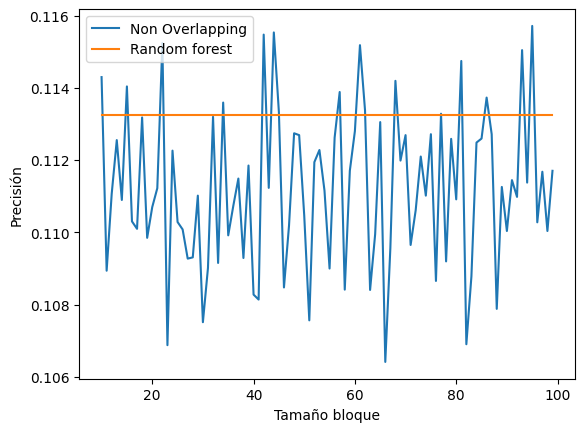

In [89]:
from matplotlib import pyplot as plt

plt_x = []
plt_y = []

for r in rmse:
    plt_x.append(rmse[r][0])
    plt_y.append(rmse[r][1])

plt.plot(plt_x, plt_y, label ='Non Overlapping')

plt_x = []
plt_y = []

for r in rmse:
    plt_x.append(rmse[r][0])
    plt_y.append(rf_precision)

plt.plot(plt_x, plt_y, '-', label ='Random forest')

plt.xlabel("Tamaño bloque")
plt.ylabel("Precisión")
plt.legend()
plt.show()

In [24]:
rmse2 = dict()
for i in range(10, 100):
    block_size = i #int(count_row // i)
    rfts = RandomForestForTimeSeriesClassifier(n_jobs=10, n_estimators=100, block_size=i, max_depth=10, block_type=BLOCK_TYPES[1])
    rfts.fit(X_train, Y_train)
    y_pred = rfts.predict(X_test)
    print(f"RMSE: ({i}, {block_size})")
    print(metrics.accuracy_score(Y_test, y_pred))
    rmse2[i] = (block_size, metrics.accuracy_score(Y_test, y_pred))

RMSE: (10, 10)
0.11426435715022168
RMSE: (11, 11)
0.11030346771144792
RMSE: (12, 12)
0.11008866893494175
RMSE: (13, 13)
0.10956455992026669
RMSE: (14, 14)
0.11465099494793278
RMSE: (15, 15)
0.11568202907516238
RMSE: (16, 16)
0.1136457366738839
RMSE: (17, 17)
0.11411829398219747
RMSE: (18, 18)
0.10896312334604942
RMSE: (19, 19)
0.11168677183214765
RMSE: (20, 20)
0.10980513454995361
RMSE: (21, 21)
0.11139464549609926
RMSE: (22, 22)
0.11201326597243702
RMSE: (23, 23)
0.11122280647489433
RMSE: (24, 24)
0.1108533525793037
RMSE: (25, 25)
0.11282950132316047
RMSE: (26, 26)
0.11096504794308691
RMSE: (27, 27)
0.11244286352544935
RMSE: (28, 28)
0.11356840911434168
RMSE: (29, 29)
0.11214214523834072
RMSE: (30, 30)
0.11518369591366807
RMSE: (31, 31)
0.11509777640306561
RMSE: (32, 32)
0.11204763377667801
RMSE: (33, 33)
0.11238271986802763
RMSE: (34, 34)
0.11559610956455992
RMSE: (35, 35)
0.1125803347424133
RMSE: (36, 36)
0.10739938825308451
RMSE: (37, 37)
0.11248582328075059
RMSE: (38, 38)
0.111351

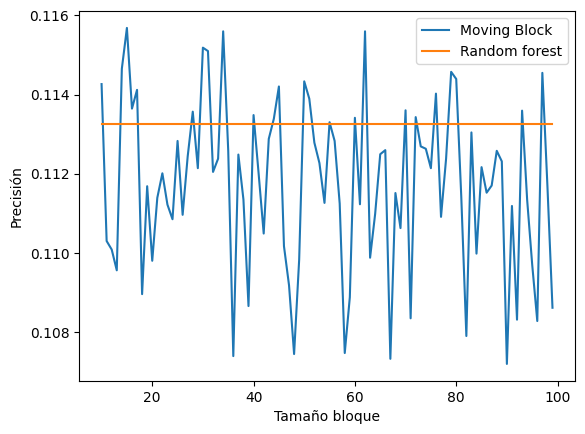

In [92]:
plt_x = []
plt_y = []

for r in rmse2:
    plt_x.append(rmse2[r][0])
    plt_y.append(rmse2[r][1])

plt.plot(plt_x, plt_y, label ='Moving Block')

plt_x = []
plt_y = []
for r in rmse:
    plt_x.append(rmse2[r][0])
    plt_y.append(rf_precision)

plt.plot(plt_x, plt_y, '-', label ='Random forest')

plt.xlabel("Tamaño bloque")
plt.ylabel("Precisión")
plt.legend()
plt.show()

In [26]:
rmse3 = dict()
for i in range(10, 100):
    block_size = i #int(count_row // i)
    rfts = RandomForestForTimeSeriesClassifier(n_jobs=10, n_estimators=100, block_size=i, max_depth=10, block_type=BLOCK_TYPES[2])
    rfts.fit(X_train, Y_train)
    y_pred = rfts.predict(X_test)
    print(f"RMSE: ({i}, {block_size})")
    print(metrics.accuracy_score(Y_test, y_pred))
    rmse3[i] = (block_size, metrics.accuracy_score(Y_test, y_pred))

RMSE: (10, 10)
0.1119359384128948
RMSE: (11, 11)
0.10915214626937485
RMSE: (12, 12)
0.11486579372443895
RMSE: (13, 13)
0.11297556449118466
RMSE: (14, 14)
0.11102519160050864
RMSE: (15, 15)
0.11443619617142661
RMSE: (16, 16)
0.11019177234766471
RMSE: (17, 17)
0.1124514554765096
RMSE: (18, 18)
0.11136886964291852
RMSE: (19, 19)
0.112709214008317
RMSE: (20, 20)
0.11188438670653332
RMSE: (21, 21)
0.11201326597243702
RMSE: (22, 22)
0.11166958793002715
RMSE: (23, 23)
0.11496030518610166
RMSE: (24, 24)
0.11387771935251056
RMSE: (25, 25)
0.10968484723511016
RMSE: (26, 26)
0.10699556655325292
RMSE: (27, 27)
0.10834450286971166
RMSE: (28, 28)
0.11282090937210022
RMSE: (29, 29)
0.11263188644877478
RMSE: (30, 30)
0.11218510499364195
RMSE: (31, 31)
0.11203904182561776
RMSE: (32, 32)
0.11532975908169227
RMSE: (33, 33)
0.11382616764614908
RMSE: (34, 34)
0.11374024813554662
RMSE: (35, 35)
0.11197030621713579
RMSE: (36, 36)
0.11354263326116094
RMSE: (37, 37)
0.11070728941127951
RMSE: (38, 38)
0.1141354

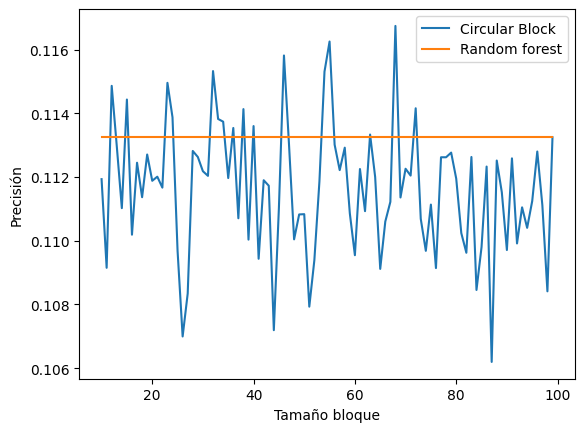

In [93]:
plt_x = []
plt_y = []

for r in rmse3:
    plt_x.append(rmse3[r][0])
    plt_y.append(rmse3[r][1])

plt.plot(plt_x, plt_y, label ='Circular Block')

plt_x = []
plt_y = []
for r in rmse:
    plt_x.append(rmse2[r][0])
    plt_y.append(rf_precision)

plt.plot(plt_x, plt_y, '-', label ='Random forest')

plt.xlabel("Tamaño bloque")
plt.ylabel("Precisión")
plt.legend()
plt.show()

In [77]:
rftstpMov = RandomForestForTimeSeriesClassifier(n_jobs=10, n_estimators=100, max_depth=10, block_size=30, block_type=BLOCK_TYPES[1])
rftstpMov.fit(X_train, Y_train)

RandomForestForTimeSeriesClassifier(block_size=30, block_type='moving-window',
                                    max_depth=10, n_jobs=10)

In [78]:
y_pred = rftstpMov.predict(X_test)

In [79]:
print("Precisión:")
print(metrics.accuracy_score(Y_test, y_pred))

Precisión:
0.11335361033783552


In [80]:
rftstpCir = RandomForestForTimeSeriesClassifier(n_jobs=10, n_estimators=100, max_depth=10, block_size=30, block_type=BLOCK_TYPES[2])
rftstpCir.fit(X_train, Y_train)

RandomForestForTimeSeriesClassifier(block_size=30, block_type='circular-window',
                                    max_depth=10, n_jobs=10)

In [81]:
y_pred = rftstpCir.predict(X_test)

In [82]:
print("Precisión:")
print(metrics.accuracy_score(Y_test, y_pred))

Precisión:
0.11223665670000343


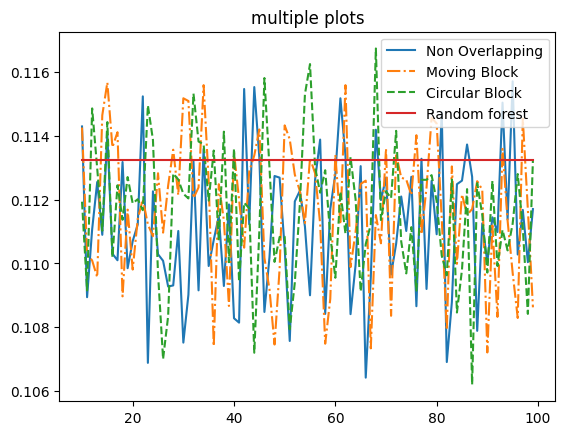

In [74]:
plt_x = []
plt_y = []

for r in rmse:
    plt_x.append(rmse[r][0])
    plt_y.append(rmse[r][1])

plt.plot(plt_x, plt_y, label ='Non Overlapping')

plt_x = []
plt_y = []

for r in rmse2:
    plt_x.append(rmse2[r][0])
    plt_y.append(rmse2[r][1])

plt.plot(plt_x, plt_y, '-.', label ='Moving Block')

plt_x = []
plt_y = []

for r in rmse3:
    plt_x.append(rmse3[r][0])
    plt_y.append(rmse3[r][1])

plt.plot(plt_x, plt_y, '--', label ='Circular Block')


plt_x = []
plt_y = []

for r in rmse3:
    plt_x.append(rmse3[r][0])
    plt_y.append(rf_precision)

plt.plot(plt_x, plt_y, '-', label ='Random forest')

plt.legend()
plt.title('multiple plots')
plt.show()

([<matplotlib.axis.XTick at 0x1480a019050>,
 [Text(0, 0, 'Non Overlapping'),
  Text(1, 0, 'Moving Block'),
  Text(2, 0, 'Circular Block')])

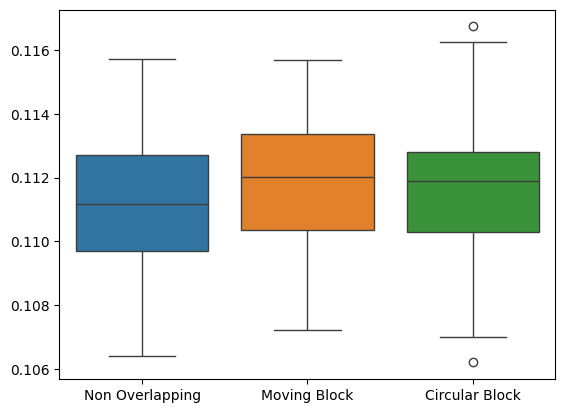

In [98]:
import seaborn as sns

data1 = []
for r in rmse:
    data1.append(rmse[r][1])
data2 = []
for r in rmse2:
    data2.append(rmse2[r][1])
data3 = []
for r in rmse3:
    data3.append(rmse3[r][1])

all_arr = [data1,
           data2,
           data3]
sns.boxplot(data=all_arr)
plt.xticks([0, 1, 2], ["Non Overlapping", "Moving Block", "Circular Block"])